In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [22]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [23]:

X_train_lr = X_train.reshape(len(X_train), -1)
X_test_lr = X_test.reshape(len(X_test), -1)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_lr, y_train)

y_pred_lr = lr.predict(X_test_lr)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9265
Confusion Matrix:
 [[ 958    0    1    3    1    9    4    3    1    0]
 [   0 1110    5    2    0    2    3    2   11    0]
 [   6    9  931   16   10    3   12    9   32    4]
 [   4    1   17  924    1   24    2   10   20    7]
 [   1    3    8    3  922    0    5    4    6   30]
 [   9    2    3   35    9  778   15    6   31    4]
 [   8    3    8    2    7   16  911    2    1    0]
 [   1    7   23    7    6    1    0  950    2   31]
 [   9   11    6   20    8   28   14   10  856   12]
 [   9    7    1    9   22    7    0   21    8  925]]


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Dropout


In [26]:
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.10),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.10),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

history = cnn.fit(
    X_train_cnn, y_train_cat,
    epochs=8,
    validation_split=0.2,
    batch_size=64
)


c:\env\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9078 - loss: 0.2918 - val_accuracy: 0.9685 - val_loss: 0.1082
Epoch 2/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9713 - loss: 0.0943 - val_accuracy: 0.9804 - val_loss: 0.0675
Epoch 3/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9786 - loss: 0.0687 - val_accuracy: 0.9812 - val_loss: 0.0615
Epoch 4/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9828 - loss: 0.0543 - val_accuracy: 0.9840 - val_loss: 0.0515
Epoch 5/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9849 - loss: 0.0457 - val_accuracy: 0.9803 - val_loss: 0.0630
Epoch 6/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9875 - loss: 0.0401 - val_accuracy: 0.9864 - val_loss: 0.0455
Epoch 7/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9893 - loss: 0.0342 - val_accuracy: 0.9840 - val_loss: 0.0511
Epoch 8/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9902 - loss: 0.0294 - val_accu

In [27]:
cnn_loss, cnn_acc = cnn.evaluate(X_test_cnn, y_test_cat)
print("CNN Accuracy:", cnn_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9860 - loss: 0.0477
CNN Accuracy: 0.9860000014305115


In [28]:
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=1)
print("CNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cnn))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
CNN Confusion Matrix:
 [[ 973    1    1    1    0    0    1    1    1    1]
 [   0 1129    2    2    0    0    1    1    0    0]
 [   2    1 1007   12    0    1    1    7    1    0]
 [   0    0    2 1002    0    5    0    1    0    0]
 [   0    0    0    0  971    0    2    0    0    9]
 [   3    0    0    3    0  883    1    1    1    0]
 [   3    3    0    2    3    4  941    0    2    0]
 [   1    3   10    8    0    1    0 1003    2    0]
 [   1    1    1    5    0    0    0    1  962    3]
 [   1    1    2    1    2    3    1    6    3  989]]


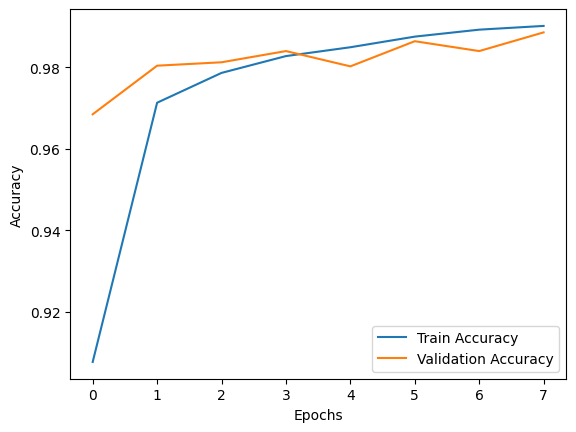

In [29]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
